In [1]:
import sys
import os

# Add the path to sys.path for the current Python session
new_path = "/home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax"

# Add to sys.path if not already there
if new_path not in sys.path:
    sys.path.insert(0, new_path)

# Also set PYTHONPATH for any subprocesses
os.environ["PYTHONPATH"] = f"{new_path}:{os.environ.get('PYTHONPATH', '')}"

# Verify it worked
print("Python path updated:")
print(f"sys.path includes: {new_path}")
print(f"PYTHONPATH env var: {os.environ['PYTHONPATH']}")

Python path updated:
sys.path includes: /home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax
PYTHONPATH env var: /home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax:


In [2]:
import sys
import math

import jax.numpy as jnp


def get_sizes(state):
    try:
        size = len(state.current_player)
        width = math.ceil(math.sqrt(size - 0.1))
        if size - (width - 1) ** 2 >= width:
            height = width
        else:
            height = width - 1
    except TypeError:
        size = 1
        width = 1
        height = 1
    return size, width, height


def get_cmap(n_channels):
    # import seaborn as sns  # type: ignore
    # return cmap = sns.color_palette("cubehelix", n_channels)
    assert n_channels in (4, 6, 7, 10)
    if n_channels == 4:
        return [(0.08605633600581405, 0.23824692404212, 0.30561236308077167), (0.32927729263408284, 0.4762845556584382, 0.1837155549758328), (0.8146245329198283, 0.49548316572322215, 0.5752525936416857), (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]
    elif n_channels == 6:
        return [(0.10231025194333628, 0.13952898866828906, 0.2560120319409181), (0.10594361078604106, 0.3809739011595331, 0.27015111282899046), (0.4106130272672762, 0.48044780541672255, 0.1891154277778484), (0.7829183382530567, 0.48158303462490826, 0.48672451968362596), (0.8046168329276406, 0.6365733569301846, 0.8796578402926125), (0.7775608374378459, 0.8840392521212448, 0.9452007992345052)]
    elif n_channels == 7:
        return [(0.10419418740482515, 0.11632019220053316, 0.2327552016195138), (0.08523511613408935, 0.32661779003565533, 0.2973201282529313), (0.26538761550634205, 0.4675654910052002, 0.1908220644759285), (0.6328422475018423, 0.4747981096220677, 0.29070209208025455), (0.8306875710682655, 0.5175161303658079, 0.6628221028832032), (0.7779565181455343, 0.7069421942599752, 0.9314406084043191), (0.7964528047840354, 0.908668973545918, 0.9398253500983916)]
    elif n_channels == 10:
        return [(0.09854228363950114, 0.07115215572295082, 0.16957891809124037), (0.09159726558869188, 0.20394337960213008, 0.29623965888210324), (0.09406611799930162, 0.3578871412608098, 0.2837709711722866), (0.23627685553553793, 0.46114369021199075, 0.19770731888985724), (0.49498740849493095, 0.4799034869159042, 0.21147789468974837), (0.7354526513473981, 0.4748861903571046, 0.40254094042448907), (0.8325928529853291, 0.5253446757844744, 0.6869376931865354), (0.7936920632275369, 0.6641337211433709, 0.9042311843062529), (0.7588424692372241, 0.8253990353420474, 0.9542699331220588), (0.8385645211683802, 0.9411869386771845, 0.9357655639413166)]


# /home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax/pgx/minatar/utils.py

def visualize_minatar(state, savefile=None, fmt="svg", dpi=160):
    # Modified from https://github.com/kenjyoung/MinAtar
    try:
        import matplotlib.colors as colors  # type: ignore
        import matplotlib.pyplot as plt  # type: ignore
    except ImportError:
        sys.stderr.write("MinAtar environment requires matplotlib for visualization. Please install matplotlib.")
        sys.exit(1)

    obs = state.observation
    n_channels = obs.shape[-1]
    cmap = get_cmap(n_channels)
    cmap.insert(0, (0, 0, 0))
    cmap = colors.ListedColormap(cmap)
    bounds = [i for i in range(n_channels + 2)]
    norm = colors.BoundaryNorm(bounds, n_channels + 1)
    size, w, h = get_sizes(state)
    fig, ax = plt.subplots(h, w)
    n_channels = obs.shape[-1]
    if size == 1:
        numerical_state = (
            jnp.amax(
                obs * jnp.reshape(jnp.arange(n_channels) + 1, (1, 1, -1)), 2
            )
            + 0.5
        )
        ax.imshow(numerical_state, cmap=cmap, norm=norm, interpolation="none")
        ax.set_axis_off()
    else:
        for j in range(size):
            numerical_state = (
                jnp.amax(
                    obs[j] * jnp.reshape(jnp.arange(n_channels) + 1, (1, 1, -1)),
                    2,
                )
                + 0.5
            )
            if h == 1:
                ax[j].imshow(numerical_state, cmap=cmap, norm=norm, interpolation="none")
                ax[j].set_axis_off()
            else:
                ax[j // w, j % w].imshow(numerical_state, cmap=cmap, norm=norm, interpolation="none")
                ax[j // w, j % w].set_axis_off()

    if savefile is None:
        # Return in-memory image
        if fmt == "svg":
            from io import StringIO
            sio = StringIO()
            plt.savefig(sio, format="svg", bbox_inches="tight")
            plt.close(fig)
            return sio.getvalue()  # str (SVG markup)
        else:
            from io import BytesIO
            bio = BytesIO()
            plt.savefig(bio, format=fmt, bbox_inches="tight", dpi=dpi)
            plt.close(fig)
            bio.seek(0)
            return bio.getvalue()  # bytes (e.g., PNG)
    else:
        plt.savefig(savefile, format=fmt, bbox_inches="tight", dpi=(None if fmt == "svg" else dpi))
        plt.close(fig)
        return savefile


In [ ]:
"""
MinAtar/Freeway with JIT-compatible K-frame skipping.

Changes vs. baseline:
- Add `frame_skip: int = 2` to MinAtarFreeway.__init__.
- Implement frame skipping inside `_step` via `jax.lax.fori_loop`.
- Compute one sticky-processed effective action per external step and repeat it
  for `frame_skip` internal steps, accumulating rewards. Each micro-step samples
  new car speeds/directions (as in the original logic).
"""

from typing import Literal, Optional

import jax
from jax import numpy as jnp

import pgx.core as core
from pgx._src.struct import dataclass
from pgx._src.types import Array, PRNGKey

player_speed = jnp.array(3, dtype=jnp.int32)
time_limit = jnp.array(2500, dtype=jnp.int32)

FALSE = jnp.bool_(False)
TRUE = jnp.bool_(True)
ZERO = jnp.array(0, dtype=jnp.int32)
ONE = jnp.array(1, dtype=jnp.int32)
NINE = jnp.array(9, dtype=jnp.int32)


@dataclass
class State(core.State):
    current_player: Array = jnp.int32(0)
    observation: Array = jnp.zeros((10, 10, 7), dtype=jnp.bool_)
    rewards: Array = jnp.zeros(1, dtype=jnp.float32)  # (1,)
    terminated: Array = FALSE
    truncated: Array = FALSE
    legal_action_mask: Array = jnp.ones(3, dtype=jnp.bool_)
    _step_count: Array = jnp.int32(0)
    # --- MinAtar Freeway specific ---
    _cars: Array = jnp.zeros((8, 4), dtype=jnp.int32)
    _pos: Array = jnp.array(9, dtype=jnp.int32)
    _move_timer: Array = jnp.array(player_speed, dtype=jnp.int32)
    _terminate_timer: Array = jnp.array(time_limit, dtype=jnp.int32)
    _terminal: Array = jnp.array(False, dtype=jnp.bool_)
    _last_action: Array = jnp.array(0, dtype=jnp.int32)

    @property
    def env_id(self) -> core.EnvId:
        return "minatar-freeway"

    def to_svg(
        self,
        *,
        color_theme: Optional[Literal["light", "dark"]] = None,
        scale: Optional[float] = None,
    ) -> str:
        del color_theme, scale
        from .utils import visualize_minatar

        return visualize_minatar(self)

    def save_svg(
        self,
        filename,
        *,
        color_theme: Optional[Literal["light", "dark"]] = None,
        scale: Optional[float] = None,
    ) -> None:
        from .utils import visualize_minatar

        visualize_minatar(self, filename)


class MinAtarFreeway(core.Env):
    def __init__(
        self,
        *,
        use_minimal_action_set: bool = True,
        sticky_action_prob: float = 0.1,
        frame_skip: int = 2,  # NEW: K-frame skipping (default 2)
    ):
        super().__init__()
        assert frame_skip >= 1, "frame_skip must be >= 1"
        self.use_minimal_action_set = use_minimal_action_set
        self.sticky_action_prob: float = float(sticky_action_prob)
        self.frame_skip: int = int(frame_skip)

        self.minimal_action_set = jnp.int32([0, 2, 4])
        self.legal_action_mask = jnp.ones(6, dtype=jnp.bool_)
        if self.use_minimal_action_set:
            self.legal_action_mask = jnp.ones(
                self.minimal_action_set.shape[0], dtype=jnp.bool_
            )

    def step(
        self, state: core.State, action: Array, key: Optional[Array] = None
    ) -> core.State:
        assert key is not None, (
            "v2.0.0 changes the signature of step. Please specify PRNGKey at the third argument:\n\n"
            "  * <  v2.0.0: step(state, action)\n"
            "  * >= v2.0.0: step(state, action, key)\n\n"
            "See v2.0.0 release note for more details:\n\n"
            "  https://github.com/sotetsuk/pgx/releases/tag/v2.0.0"
        )
        return super().step(state, action, key)

    def _init(self, key: PRNGKey) -> State:
        state = _init(rng=key)  # type: ignore
        state = state.replace(legal_action_mask=self.legal_action_mask)  # type: ignore
        return state  # type: ignore

    def _step(self, state: core.State, action, key) -> State:
        assert isinstance(state, State)
        # Keep mask current
        state = state.replace(legal_action_mask=self.legal_action_mask)  # type: ignore

        # Map minimal action set if enabled
        action = jax.lax.select(
            jnp.bool_(self.use_minimal_action_set),
            self.minimal_action_set[action],
            action,
        )
        action = jnp.int32(action)

        # Sticky override ONCE per external step; then repeat effective action
        key_sticky, key_loop = jax.random.split(key, 2)
        effective_action = jax.lax.cond(
            jax.random.uniform(key_sticky) < self.sticky_action_prob,
            lambda: state._last_action,
            lambda: action,
        )
        effective_action = jnp.int32(effective_action)

        # fori_loop carry: (State, total_reward(float32), done(bool), rng)
        def body_fn(i, carry):
            s, rsum, done, rng = carry

            def do_step(args):
                s_inner, rsum_inner, _done_inner, rng_inner = args
                rng_inner, sub = jax.random.split(rng_inner)
                speeds, directions = _random_speed_directions(sub)
                s_next = _step_det(s_inner, effective_action, speeds=speeds, directions=directions)
                rsum_next = rsum_inner + s_next.rewards[0]
                done_next = s_next.terminated
                return (s_next, rsum_next, done_next, rng_inner)

            return jax.lax.cond(done, lambda x: x, do_step, (s, rsum, done, rng))

        r0 = jnp.array(0.0, dtype=jnp.float32)
        d0 = FALSE
        state, total_r, _, _ = jax.lax.fori_loop(
            0, int(self.frame_skip), body_fn, (state, r0, d0, key_loop)
        )

        # Overwrite reward with accumulated total for this external step
        state = state.replace(rewards=total_r[jnp.newaxis])  # type: ignore
        return state  # type: ignore

    def _observe(self, state: core.State, player_id: Array) -> Array:
        assert isinstance(state, State)
        return _observe(state)

    @property
    def id(self) -> core.EnvId:
        return "minatar-freeway"

    @property
    def version(self) -> str:
        return "v1"

    @property
    def num_players(self):
        return 1


def _step(
    state: State,
    action: Array,
    key,
    sticky_action_prob,
):
    # (Kept for API completeness; not used when class-level frame_skip is active)
    action = jnp.int32(action)
    key0, key1 = jax.random.split(key, 2)
    action = jax.lax.cond(
        jax.random.uniform(key0) < sticky_action_prob,
        lambda: state._last_action,
        lambda: action,
    )
    speeds, directions = _random_speed_directions(key1)
    return _step_det(state, action, speeds=speeds, directions=directions)


def _init(rng: Array) -> State:
    speeds, directions = _random_speed_directions(rng)
    return _init_det(speeds=speeds, directions=directions)


def _step_det(
    state: State,
    action: Array,
    speeds: Array,
    directions: Array,
):
    cars = state._cars
    pos = state._pos
    move_timer = state._move_timer
    terminate_timer = state._terminate_timer
    terminal = state._terminal
    last_action = action

    r = jnp.array(0, dtype=jnp.float32)

    move_timer, pos = jax.lax.cond(
        (action == 2) & (move_timer == 0),
        lambda: (player_speed, jax.lax.max(ZERO, pos - ONE)),
        lambda: (move_timer, pos),
    )
    move_timer, pos = jax.lax.cond(
        (action == 4) & (move_timer == 0),
        lambda: (player_speed, jax.lax.min(NINE, pos + ONE)),
        lambda: (move_timer, pos),
    )

    # Win condition
    cars, r, pos = jax.lax.cond(
        pos == 0,
        lambda: (
            _randomize_cars(speeds, directions, cars, initialize=False),
            r + 1,
            NINE,
        ),
        lambda: (cars, r, pos),
    )

    pos, cars = _update_cars(pos, cars)

    # Update various timers
    move_timer = jax.lax.cond(
        move_timer > 0, lambda: move_timer - 1, lambda: move_timer
    )
    terminate_timer -= ONE
    terminal = terminate_timer < 0

    next_state = state.replace(  # type: ignore
        _cars=cars,
        _pos=pos,
        _move_timer=move_timer,
        _terminate_timer=terminate_timer,
        _terminal=terminal,
        _last_action=last_action,
        rewards=r[jnp.newaxis],
        terminated=terminal,
    )

    return next_state


def _update_cars(pos, cars):
    def _update_stopped_car(pos, car):
        car = car.at[2].set(jax.lax.abs(car[3]))
        car = jax.lax.cond(
            car[3] > 0, lambda: car.at[0].add(1), lambda: car.at[0].add(-1)
        )
        car = jax.lax.cond(car[0] < 0, lambda: car.at[0].set(9), lambda: car)
        car = jax.lax.cond(car[0] > 9, lambda: car.at[0].set(0), lambda: car)
        pos = jax.lax.cond(
            (car[0] == 4) & (car[1] == pos), lambda: NINE, lambda: pos
        )
        return pos, car

    def _update_car(pos, car):
        pos = jax.lax.cond(
            (car[0] == 4) & (car[1] == pos), lambda: NINE, lambda: pos
        )
        pos, car = jax.lax.cond(
            car[2] == 0,
            lambda: _update_stopped_car(pos, car),
            lambda: (pos, car.at[2].add(-1)),
        )
        return pos, car

    pos, cars = jax.lax.scan(_update_car, pos, cars)

    return pos, cars


def _init_det(speeds: Array, directions: Array) -> State:
    cars = _randomize_cars(speeds, directions, initialize=True)
    return State(_cars=cars)  # type: ignore


def _randomize_cars(
    speeds: Array,
    directions: Array,
    cars: Array = jnp.zeros((8, 4), dtype=int),
    initialize: bool = False,
) -> Array:
    speeds *= directions

    def _init(_cars):
        _cars = _cars.at[:, 1].set(jnp.arange(1, 9))
        _cars = _cars.at[:, 2].set(jax.lax.abs(speeds))
        _cars = _cars.at[:, 3].set(speeds)
        return _cars

    def _update(_cars):
        _cars = _cars.at[:, 2].set(abs(speeds))
        _cars = _cars.at[:, 3].set(speeds)
        return _cars

    return jax.lax.cond(initialize, _init, _update, cars)


def _random_speed_directions(rng):
    rng1, rng2 = jax.random.split(rng, 2)
    speeds = jax.random.randint(rng1, [8], 1, 6, dtype=jnp.int32)
    directions = jax.random.choice(
        rng2, jnp.array([-1, 1], dtype=jnp.int32), [8]
    )
    return speeds, directions


def _observe(state: State) -> Array:
    obs = jnp.zeros((10, 10, 7), dtype=jnp.bool_)
    obs = obs.at[state._pos, 4, 0].set(TRUE)

    def _update_obs(i, _obs):
        car = state._cars[i]
        _obs = _obs.at[car[1], car[0], 1].set(TRUE)
        back_x = jax.lax.cond(
            car[3] > 0, lambda: car[0] - 1, lambda: car[0] + 1
        )
        back_x = jax.lax.cond(back_x < 0, lambda: NINE, lambda: back_x)
        back_x = jax.lax.cond(back_x > 9, lambda: ZERO, lambda: back_x)
        trail = jax.lax.abs(car[3]) + 1
        _obs = _obs.at[car[1], back_x, trail].set(TRUE)
        return _obs

    obs = jax.lax.fori_loop(0, 8, _update_obs, obs)
    return obs


In [3]:
"""
MinAtar/Breakout with JIT-compatible K-frame skipping.

Changes vs. baseline:
- Add `frame_skip: int = 2` to MinAtarBreakout.__init__.
- Implement frame skipping inside `_step` via `jax.lax.fori_loop`.
- Compute a single effective action (after sticky override) and repeat it
  for `frame_skip` internal steps, accumulating rewards. Observation comes
  from the final internal step, and `terminated` reflects any terminal reached
  during the repeated steps.
"""

from typing import Literal, Optional

import jax
from jax import numpy as jnp

import pgx.core as core
from pgx._src.struct import dataclass
from pgx._src.types import Array, PRNGKey

FALSE = jnp.bool_(False)
TRUE = jnp.bool_(True)
ZERO = jnp.array(0, dtype=jnp.int32)
ONE = jnp.array(1, dtype=jnp.int32)
TWO = jnp.array(2, dtype=jnp.int32)
THREE = jnp.array(3, dtype=jnp.int32)
FOUR = jnp.array(4, dtype=jnp.int32)
NINE = jnp.array(9, dtype=jnp.int32)


@dataclass
class State(core.State):
    current_player: Array = jnp.int32(0)
    observation: Array = jnp.zeros((10, 10, 4), dtype=jnp.bool_)
    rewards: Array = jnp.zeros(1, dtype=jnp.float32)  # (1,)
    terminated: Array = FALSE
    truncated: Array = FALSE
    legal_action_mask: Array = jnp.ones(3, dtype=jnp.bool_)
    _step_count: Array = jnp.int32(0)
    # --- MinAtar Breakout specific ---
    _ball_y: Array = THREE
    _ball_x: Array = ZERO
    _ball_dir: Array = TWO
    _pos: Array = FOUR
    _brick_map: Array = (
        jnp.zeros((10, 10), dtype=jnp.bool_).at[1:4, :].set(True)
    )
    _strike: Array = jnp.array(False, dtype=jnp.bool_)
    _last_x: Array = ZERO
    _last_y: Array = THREE
    _terminal: Array = jnp.array(False, dtype=jnp.bool_)
    _last_action: Array = ZERO

    @property
    def env_id(self) -> core.EnvId:
        return "minatar-breakout"

    def to_svg(
        self,
        *,
        color_theme: Optional[Literal["light", "dark"]] = None,
        scale: Optional[float] = None,
    ) -> str:
        del color_theme, scale
        from .utils import visualize_minatar

        return visualize_minatar(self)

    def save_svg(
        self,
        filename,
        *,
        color_theme: Optional[Literal["light", "dark"]] = None,
        scale: Optional[float] = None,
    ) -> None:
        from .utils import visualize_minatar

        visualize_minatar(self, filename)


class MinAtarBreakout(core.Env):
    def __init__(
        self,
        *,
        use_minimal_action_set: bool = True,
        sticky_action_prob: float = 0.1,
        frame_skip: int = 2,  # NEW: K-frame skipping (default 2)
    ):
        super().__init__()
        assert frame_skip >= 1, "frame_skip must be >= 1"
        self.use_minimal_action_set = use_minimal_action_set
        self.sticky_action_prob: float = float(sticky_action_prob)
        self.frame_skip: int = int(frame_skip)

        # Minimal action set mapping (NOOP/LEFT/RIGHT for Breakout)
        self.minimal_action_set = jnp.int32([0, 1, 3])

        # Legal mask is either 6 (full) or 3 (minimal)
        self.legal_action_mask = jnp.ones(6, dtype=jnp.bool_)
        if self.use_minimal_action_set:
            self.legal_action_mask = jnp.ones(
                self.minimal_action_set.shape[0], dtype=jnp.bool_
            )

    def step(
        self, state: core.State, action: Array, key: Optional[Array] = None
    ) -> core.State:
        assert key is not None, (
            "v2.0.0 changes the signature of step. Please specify PRNGKey at the third argument:\n\n"
            "  * <  v2.0.0: step(state, action)\n"
            "  * >= v2.0.0: step(state, action, key)\n\n"
            "See v2.0.0 release note for more details:\n\n"
            "  https://github.com/sotetsuk/pgx/releases/tag/v2.0.0"
        )
        return super().step(state, action, key)

    def _init(self, key: PRNGKey) -> State:
        state = _init(rng=key)  # type: ignore
        state = state.replace(legal_action_mask=self.legal_action_mask)  # type: ignore
        return state  # type: ignore

    def _step(self, state: core.State, action, key) -> State:
        """One external env step = repeat the (sticky-processed) action for `frame_skip` internal steps."""
        # Ensure the state carries the current legal mask
        state = state.replace(legal_action_mask=self.legal_action_mask)  # type: ignore

        # Minimal action set mapping (JAX-friendly select)
        action = jax.lax.select(
            jnp.bool_(self.use_minimal_action_set),
            self.minimal_action_set[action],
            action,
        )

        # Compute effective action once (sticky override) for this macro-step
        # Then repeat that effective action for `frame_skip` internal steps.
        effective_action = jax.lax.cond(
            jax.random.uniform(key) < self.sticky_action_prob,
            lambda: jnp.int32(state._last_action),
            lambda: jnp.int32(action),
        )

        # fori_loop carry: (State, total_reward(float32), done(bool))
        def body_fn(i, carry):
            s, rsum, done = carry

            def do_step(args):
                s_inner, rsum_inner, _ = args
                s_next = _step_det(s_inner, effective_action)
                rsum_next = rsum_inner + s_next.rewards[0]
                done_next = s_next.terminated
                return (s_next, rsum_next, done_next)

            # If already done, keep state as-is (no-op), preserving JIT compatibility
            return jax.lax.cond(done, lambda x: x, do_step, (s, rsum, done))

        r0 = jnp.array(0.0, dtype=jnp.float32)
        d0 = FALSE
        state, total_r, _ = jax.lax.fori_loop(0, int(self.frame_skip), body_fn, (state, r0, d0))

        # Overwrite rewards with the accumulated total for this external step
        state = state.replace(rewards=total_r[jnp.newaxis])  # type: ignore
        return state  # type: ignore

    def _observe(self, state: core.State, player_id: Array) -> Array:
        assert isinstance(state, State)
        return _observe(state)

    @property
    def id(self) -> core.EnvId:
        return "minatar-breakout"

    @property
    def version(self) -> str:
        return "v1"

    @property
    def num_players(self):
        return 1


def _step_det(state: State, action: Array):
    ball_y = state._ball_y
    ball_x = state._ball_x
    ball_dir = state._ball_dir
    pos = state._pos
    brick_map = state._brick_map
    strike = state._strike
    terminal = state._terminal

    r = jnp.array(0, dtype=jnp.float32)

    pos = _apply_action(pos, action)

    # Update ball position
    last_x = ball_x
    last_y = ball_y
    new_x, new_y = _update_ball_pos(ball_x, ball_y, ball_dir)

    new_x, ball_dir = jax.lax.cond(
        (new_x < 0) | (new_x > 9),
        lambda: _update_ball_pos_x(new_x, ball_dir),
        lambda: (new_x, ball_dir),
    )

    is_new_y_negative = new_y < 0
    is_strike = brick_map[new_y, new_x] == 1
    is_bottom = new_y == 9
    new_y, ball_dir = jax.lax.cond(
        is_new_y_negative,
        lambda: _update_ball_pos_y(ball_dir),
        lambda: (new_y, ball_dir),
    )
    strike_toggle = ~is_new_y_negative & is_strike
    r, strike, brick_map, new_y, ball_dir = jax.lax.cond(
        ~is_new_y_negative & is_strike & ~strike,
        lambda: _update_by_strike(
            r, brick_map, new_x, new_y, last_y, ball_dir, strike
        ),
        lambda: (r, strike, brick_map, new_y, ball_dir),
    )
    brick_map, new_y, ball_dir, terminal = jax.lax.cond(
        ~is_new_y_negative & ~is_strike & is_bottom,
        lambda: _update_by_bottom(
            brick_map, ball_x, new_x, new_y, pos, ball_dir, last_y, terminal
        ),
        lambda: (brick_map, new_y, ball_dir, terminal),
    )

    strike = jax.lax.cond(
        ~strike_toggle, lambda: jnp.zeros_like(strike), lambda: strike
    )

    state = state.replace(  # type: ignore
        _ball_y=new_y,
        _ball_x=new_x,
        _ball_dir=ball_dir,
        _pos=pos,
        _brick_map=brick_map,
        _strike=strike,
        _last_x=last_x,
        _last_y=last_y,
        _terminal=terminal,
        _last_action=action,
        rewards=r[jnp.newaxis],
        terminated=terminal,
    )
    return state


def _init(rng: Array) -> State:
    ball_start = jax.random.choice(rng, 2)
    return _init_det(ball_start=ball_start)


def _apply_action(pos, action):
    pos = jax.lax.cond(
        action == 1, lambda: jax.lax.max(ZERO, pos - ONE), lambda: pos
    )
    pos = jax.lax.cond(
        action == 3, lambda: jax.lax.min(NINE, pos + ONE), lambda: pos
    )
    return pos


def _update_ball_pos(ball_x, ball_y, ball_dir):
    return jax.lax.switch(
        ball_dir,
        [
            lambda: (ball_x - ONE, ball_y - ONE),
            lambda: (ball_x + ONE, ball_y - ONE),
            lambda: (ball_x + ONE, ball_y + ONE),
            lambda: (ball_x - ONE, ball_y + ONE),
        ],
    )


def _update_ball_pos_x(new_x, ball_dir):
    new_x = jax.lax.max(ZERO, new_x)
    new_x = jax.lax.min(NINE, new_x)
    ball_dir = jnp.array([1, 0, 3, 2], dtype=jnp.int32)[ball_dir]
    return new_x, ball_dir


def _update_ball_pos_y(ball_dir):
    ball_dir = jnp.array([3, 2, 1, 0], dtype=jnp.int32)[ball_dir]
    return ZERO, ball_dir


def _update_by_strike(r, brick_map, new_x, new_y, last_y, ball_dir, strike):
    brick_map = brick_map.at[new_y, new_x].set(False)
    new_y = last_y
    ball_dir = jnp.array([3, 2, 1, 0], dtype=jnp.int32)[ball_dir]
    return r + 1, jnp.ones_like(strike), brick_map, new_y, ball_dir


def _update_by_bottom(
    brick_map, ball_x, new_x, new_y, pos, ball_dir, last_y, terminal
):
    brick_map = jax.lax.cond(
        brick_map.sum() == 0,
        lambda: brick_map.at[1:4, :].set(True),
        lambda: brick_map,
    )
    new_y, ball_dir, terminal = jax.lax.cond(
        ball_x == pos,
        lambda: (
            last_y,
            jnp.array([3, 2, 1, 0], dtype=jnp.int32)[ball_dir],
            terminal,
        ),
        lambda: jax.lax.cond(
            new_x == pos,
            lambda: (
                last_y,
                jnp.array([2, 3, 0, 1], dtype=jnp.int32)[ball_dir],
                terminal,
            ),
            lambda: (new_y, ball_dir, jnp.array(True, dtype=jnp.bool_)),
        ),
    )
    return brick_map, new_y, ball_dir, terminal


def _init_det(ball_start: Array) -> State:
    ball_x, ball_dir = jax.lax.switch(
        ball_start,
        [lambda: (ZERO, TWO), lambda: (NINE, THREE)],
    )
    last_x = ball_x
    return State(
        _ball_x=ball_x, _ball_dir=ball_dir, _last_x=last_x
    )  # type: ignore


def _observe(state: State) -> Array:
    obs = jnp.zeros((10, 10, 4), dtype=jnp.bool_)
    obs = obs.at[state._ball_y, state._ball_x, 1].set(True)
    obs = obs.at[9, state._pos, 0].set(True)
    obs = obs.at[state._last_y, state._last_x, 2].set(True)
    obs = obs.at[:, :, 3].set(state._brick_map)
    return obs


In [13]:
# -----------------------------
# Config
# -----------------------------
from pydantic import BaseModel
import pgx
class PPOConfig(BaseModel):
    env_name: Literal[
        "minatar-breakout",
        "minatar-freeway",
        "minatar-space_invaders",
        "minatar-asterix",
        "minatar-seaquest",
    ] = "minatar-breakout"
    seed: int = 0
    lr: float = 0.0003
    num_envs: int = 4096
    num_eval_envs: int = 100
    num_steps: int = 128
    total_timesteps: int = 20_000_000
    frame_skip: int = 1
    update_epochs: int = 3
    minibatch_size: int = 4096
    gamma: float = 0.99
    gae_lambda: float = 0.95
    clip_eps: float = 0.2
    ent_coef: float = 0.01
    vf_coef: float = 0.5
    max_grad_norm: float = 0.5
    wandb_project: str = "pgx-minatar-ppo"
    save_model: bool = True
    

    class Config:
        extra = "forbid"


# In Jupyter, directly create the config instead of parsing CLI args
# You can override any default values here
args = PPOConfig(
    env_name="minatar-breakout",  # Change this to test different games
    num_envs=4096,  # Smaller for testing in notebook
    total_timesteps=100000000,  # Shorter for testing
    frame_skip = 6,
    save_model=True,  # Don't save in notebook by default
)
print(f"Config: {args}")

env = pgx.make(str(args.env_name))
if args.env_name == "minatar-freeway":
    print("using custom env")
    env = MinAtarFreeway(
        use_minimal_action_set=True,
        sticky_action_prob=0.1,
        frame_skip=args.frame_skip,
    )
if args.env_name == "minatar-breakout":
    env = MinAtarBreakout(
        use_minimal_action_set=True,
        sticky_action_prob=0.1,
        frame_skip=args.frame_skip,
    )

num_updates = args.total_timesteps // args.num_envs // args.num_steps
num_minibatches = args.num_envs * args.num_steps // args.minibatch_size

Config: env_name='minatar-breakout' seed=0 lr=0.0003 num_envs=4096 num_eval_envs=100 num_steps=128 total_timesteps=100000000 frame_skip=6 update_epochs=3 minibatch_size=4096 gamma=0.99 gae_lambda=0.95 clip_eps=0.2 ent_coef=0.01 vf_coef=0.5 max_grad_norm=0.5 wandb_project='pgx-minatar-ppo' save_model=True


In [14]:
"""This PPO implementation is modified from PureJaxRL:

    https://github.com/luchris429/purejaxrl

Please refer to their work if you use this example in your research."""

import sys
import time
import math
import pickle
from functools import partial
from typing import NamedTuple, Literal

import jax
import jax.numpy as jnp
import optax
from flax import nnx
import wandb

import pgx
from pgx.experimental import auto_reset


# -----------------------------
# Simple Categorical distribution wrapper using JAX built-ins
# -----------------------------
class Categorical:
    def __init__(self, logits):
        self.logits = logits

    def sample(self, seed):
        return jax.random.categorical(seed, self.logits)

    def log_prob(self, value):
        log_probs = jax.nn.log_softmax(self.logits)
        return jnp.take_along_axis(log_probs, value[..., None], axis=-1).squeeze(-1)

    def entropy(self):
        log_probs = jax.nn.log_softmax(self.logits)
        probs = jax.nn.softmax(self.logits)
        return -(probs * log_probs).sum(axis=-1)


# -----------------------------
# NNX Actor-Critic
# -----------------------------
def pool_out_dim(n: int, window: int = 2, stride: int = 2, padding: str = "VALID") -> int:
    # Matches flax.linen/nnx pooling semantics for VALID padding
    if padding.upper() == "VALID":
        return (n - window) // stride + 1
    # Fallback (not used here)
    return math.ceil(n / stride)


class ActorCritic(nnx.Module):
    def __init__(self, num_actions: int, obs_shape, activation: str = "tanh", *, rngs: nnx.Rngs):
        assert activation in ["relu", "tanh"]
        self.num_actions = num_actions
        self.activation = activation

        H, W, C = obs_shape  # NHWC expected by flax.nnx.Conv
        # Convolution (channels-last). Default padding is 'SAME'.
        self.conv = nnx.Conv(in_features=C, out_features=32, kernel_size=(2, 2), rngs=rngs)

        # AvgPool params are fixed; keep a partial for clean callsites
        self.avg_pool = partial(nnx.avg_pool, window_shape=(2, 2), strides=(2, 2), padding="VALID")

        # After conv ('SAME') + avg_pool('VALID', 2x2, stride 2) the spatial dims become:
        H2 = pool_out_dim(H, 2, 2, "VALID")
        W2 = pool_out_dim(W, 2, 2, "VALID")
        flatten_dim = H2 * W2 * 32

        # Shared torso
        self.fc = nnx.Linear(flatten_dim, 64, rngs=rngs)

        # Actor head: 64 -> 64 -> 64 -> num_actions (two hidden layers like original)
        self.actor_h1 = nnx.Linear(64, 64, rngs=rngs)
        self.actor_h2 = nnx.Linear(64, 64, rngs=rngs)
        self.actor_out = nnx.Linear(64, num_actions, rngs=rngs)

        # Critic head: 64 -> 64 -> 64 -> 1 (two hidden layers like original)
        self.critic_h1 = nnx.Linear(64, 64, rngs=rngs)
        self.critic_h2 = nnx.Linear(64, 64, rngs=rngs)
        self.critic_out = nnx.Linear(64, 1, rngs=rngs)

    def _act(self, x):
        return nnx.relu(x) if self.activation == "relu" else nnx.tanh(x)

    def __call__(self, x):
        x = x.astype(jnp.float32)
        x = self.conv(x)
        x = nnx.relu(x)
        x = self.avg_pool(x)
        x = x.reshape((x.shape[0], -1))  # flatten
        x = nnx.relu(self.fc(x))

        a = self._act(self.actor_h1(x))
        a = self._act(self.actor_h2(a))
        logits = self.actor_out(a)

        v = self._act(self.critic_h1(x))
        v = self._act(self.critic_h2(v))
        value = self.critic_out(v)

        return logits, jnp.squeeze(value, axis=-1)


# -----------------------------
# Optimizer (Optax via NNX wrapper)
# -----------------------------
tx = optax.chain(
    optax.clip_by_global_norm(args.max_grad_norm),
    optax.adam(args.lr, eps=1e-5),
)


# -----------------------------
# Rollout container
# -----------------------------
class Transition(NamedTuple):
    done: jnp.ndarray
    action: jnp.ndarray
    value: jnp.ndarray
    reward: jnp.ndarray
    log_prob: jnp.ndarray
    obs: jnp.ndarray


# -----------------------------
# Update step (collect + optimize), jitted with NNX
# -----------------------------
def make_update_step():
    step_fn = jax.vmap(auto_reset(env.step, env.init))

    @nnx.jit(donate_argnames=("model", "optimizer"))
    def _update_step(model: nnx.Module,
                    optimizer: nnx.Optimizer,
                    env_state,
                    last_obs,
                    rng):
        # -------- Collect trajectories --------
        def _env_step(runner_state, _):
            model, optimizer, env_state, last_obs, rng = runner_state

            # Policy
            rng, _rng = jax.random.split(rng)
            logits, value = model(last_obs)
            pi = Categorical(logits=logits)
            action = pi.sample(seed=_rng)
            log_prob = pi.log_prob(action)

            # Env step
            rng, _rng = jax.random.split(rng)
            keys = jax.random.split(_rng, env_state.observation.shape[0])
            env_state = step_fn(env_state, action, keys)

            transition = Transition(
                env_state.terminated,
                action,
                value,
                jnp.squeeze(env_state.rewards),
                log_prob,
                last_obs,
            )
            runner_state = (model, optimizer, env_state, env_state.observation, rng)
            return runner_state, transition

        runner_state = (model, optimizer, env_state, last_obs, rng)
        runner_state, traj_batch = jax.lax.scan(_env_step, runner_state, None, length=args.num_steps)

        # -------- Advantage / targets (GAE) --------
        model, optimizer, env_state, last_obs, rng = runner_state
        _, last_val = model(last_obs)

        def _get_advantages(gae_and_next_value, transition):
            gae, next_value = gae_and_next_value
            done, value, reward = transition.done, transition.value, transition.reward
            delta = reward + args.gamma * next_value * (1 - done) - value
            gae = delta + args.gamma * args.gae_lambda * (1 - done) * gae
            return (gae, value), gae

        (_, _), advantages = jax.lax.scan(
            _get_advantages,
            (jnp.zeros_like(last_val), last_val),
            traj_batch,
            reverse=True,
            unroll=16,
        )
        targets = advantages + traj_batch.value

        # -------- SGD epochs --------
        def _update_epoch(update_state, _):
            model, optimizer, traj_batch, advantages, targets, rng = update_state

            def _update_minibatch(state, minibatch):
                model, optimizer = state
                mb_traj, mb_adv, mb_targets = minibatch

                def _loss_fn(model: nnx.Module, traj: Transition, gae, targets):
                    # Re-run policy
                    logits, value = model(traj.obs)
                    pi = Categorical(logits=logits)
                    log_prob = pi.log_prob(traj.action)

                    # Value loss (clipped)
                    value_pred_clipped = traj.value + (value - traj.value).clip(-args.clip_eps, args.clip_eps)
                    v_loss_unclipped = jnp.square(value - targets)
                    v_loss_clipped = jnp.square(value_pred_clipped - targets)
                    value_loss = 0.5 * jnp.maximum(v_loss_unclipped, v_loss_clipped).mean()

                    # Policy loss (clipped)
                    ratio = jnp.exp(log_prob - traj.log_prob)
                    gae = (gae - gae.mean()) / (gae.std() + 1e-8)
                    loss_actor1 = ratio * gae
                    loss_actor2 = jnp.clip(ratio, 1.0 - args.clip_eps, 1.0 + args.clip_eps) * gae
                    loss_actor = -jnp.minimum(loss_actor1, loss_actor2).mean()

                    # Entropy bonus
                    entropy = pi.entropy().mean()

                    total = loss_actor + args.vf_coef * value_loss - args.ent_coef * entropy
                    return total, (value_loss, loss_actor, entropy)

                # Compute grads w.r.t. model Params
                (total_loss, aux), grads = nnx.value_and_grad(
                    _loss_fn, has_aux=True, argnums=nnx.DiffState(0, nnx.Param)
                )(model, mb_traj, mb_adv, mb_targets)

                # Optax step via NNX Optimizer (updates model in-place)
                optimizer.update(model, grads)

                return (model, optimizer), (total_loss, aux)

            # Shuffle + minibatch
            rng, _rng = jax.random.split(rng)
            batch_size = args.minibatch_size * num_minibatches
            assert batch_size == args.num_steps * args.num_envs, "batch size must equal steps * envs"

            batch = (traj_batch, advantages, targets)
            batch = jax.tree.map(lambda x: x.reshape((batch_size,) + x.shape[2:]), batch)
            permutation = jax.random.permutation(_rng, batch_size)
            shuffled = jax.tree.map(lambda x: jnp.take(x, permutation, axis=0), batch)
            minibatches = jax.tree.map(
                lambda x: jnp.reshape(x, [num_minibatches, -1] + list(x.shape[1:])),
                shuffled,
            )

            (model, optimizer), losses = jax.lax.scan(_update_minibatch, (model, optimizer), minibatches)
            update_state = (model, optimizer, traj_batch, advantages, targets, rng)
            return update_state, losses

        update_state = (model, optimizer, traj_batch, advantages, targets, rng)
        update_state, loss_info = jax.lax.scan(_update_epoch, update_state, None, length=args.update_epochs)

        model, optimizer, _, _, _, rng = update_state
        runner_state = (model, optimizer, env_state, last_obs, rng)
        return runner_state, loss_info

    return _update_step


# -----------------------------
# Evaluation (greedy sample)
# -----------------------------
@nnx.jit
def evaluate(model: nnx.Module, rng_key):
    step_fn = jax.vmap(env.step)
    rng_key, sub_key = jax.random.split(rng_key)
    subkeys = jax.random.split(sub_key, args.num_eval_envs)
    state = jax.vmap(env.init)(subkeys)
    R = jnp.zeros_like(state.rewards)

    def cond_fn(tup):
        state, _, _ = tup
        return ~state.terminated.all()

    def loop_fn(tup):
        state, R, rng_key = tup
        logits, _value = model(state.observation)
        pi = Categorical(logits=logits)
        rng_key, _rng = jax.random.split(rng_key)
        action = pi.sample(seed=_rng)
        rng_key, _rng = jax.random.split(rng_key)
        keys = jax.random.split(_rng, state.observation.shape[0])
        state = step_fn(state, action, keys)
        return state, R + state.rewards, rng_key

    state, R, _ = jax.lax.while_loop(cond_fn, loop_fn, (state, R, rng_key))
    return R.mean()


# -----------------------------
# Training Loop
# -----------------------------
def train(rng):
    tt = 0.0
    st = time.time()

    # Model + optimizer
    rng, _rng = jax.random.split(rng)
    obs_shape = env.observation_shape
    model = ActorCritic(env.num_actions, obs_shape=obs_shape, activation="tanh", rngs=nnx.Rngs(_rng))
    optimizer = nnx.Optimizer(model, tx, wrt=nnx.Param)

    # Update function
    update_step = make_update_step()

    # Init envs
    rng, _rng = jax.random.split(rng)
    reset_rng = jax.random.split(_rng, args.num_envs)
    env_state = jax.jit(jax.vmap(env.init))(reset_rng)
    last_obs = env_state.observation

    rng, _rng = jax.random.split(rng)
    runner_state = (model, optimizer, env_state, last_obs, _rng)

    # Warmup (compile)
    _, _ = update_step(*runner_state)

    # initial evaluation
    et = time.time()
    tt += et - st
    rng, _rng = jax.random.split(rng)
    eval_R = evaluate(runner_state[0], _rng)
    steps = 0
    log = {"sec": tt, f"{args.env_name}/eval_R": float(eval_R), "steps": steps}
    print(log)

    # Only log to wandb if initialized
    if wandb.run is not None:
        wandb.log(log)
    st = time.time()

    for _ in range(num_updates):
        runner_state, loss_info = update_step(*runner_state)
        model, optimizer, env_state, last_obs, rng = runner_state
        steps += args.num_envs * args.num_steps

        # evaluation
        et = time.time()
        tt += et - st
        rng, _rng = jax.random.split(rng)
        eval_R = evaluate(model, _rng)
        log = {"sec": tt, f"{args.env_name}/eval_R": float(eval_R), "steps": steps}
        print(log)

        # Only log to wandb if initialized
        if wandb.run is not None:
            wandb.log(log)
        st = time.time()

    return runner_state  # (model, optimizer, env_state, last_obs, rng)


# -----------------------------
# Run training (for notebook execution)
# -----------------------------
# Or run without wandb
wandb.init(
    project=args.wandb_project,        # "pgx-minatar-ppo" by default
    name=f"{args.env_name}-frameskip{args.frame_skip}",
    config=args.dict() if hasattr(args, "dict") else vars(args),
)
# Start training
print("Starting training...")
rng = jax.random.PRNGKey(args.seed)
runner_state = train(rng)

# Save model if desired
if args.save_model:
    model = runner_state[0]
    # Save only learnable parameters
    with open(f"{args.env_name}-seed={args.seed}-notebook.ckpt", "wb") as f:
        pickle.dump(nnx.state(model, nnx.Param), f)
    print(f"Model saved to {args.env_name}-seed={args.seed}-notebook.ckpt")

print("Training complete!")
wandb.finish()

/tmp/ipykernel_2826168/2208171417.py:362: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  config=args.dict() if hasattr(args, "dict") else vars(args),


Starting training...
{'sec': 6.764850378036499, 'minatar-breakout/eval_R': 0.22999998927116394, 'steps': 0}
{'sec': 6.963831186294556, 'minatar-breakout/eval_R': 0.35999998450279236, 'steps': 524288}
{'sec': 7.159559011459351, 'minatar-breakout/eval_R': 0.4099999964237213, 'steps': 1048576}
{'sec': 7.3553783893585205, 'minatar-breakout/eval_R': 0.6299999952316284, 'steps': 1572864}
{'sec': 7.551450490951538, 'minatar-breakout/eval_R': 0.9599999785423279, 'steps': 2097152}
{'sec': 7.747801780700684, 'minatar-breakout/eval_R': 1.4299999475479126, 'steps': 2621440}
{'sec': 7.943371295928955, 'minatar-breakout/eval_R': 1.2999999523162842, 'steps': 3145728}
{'sec': 8.13919472694397, 'minatar-breakout/eval_R': 1.75, 'steps': 3670016}
{'sec': 8.334853410720825, 'minatar-breakout/eval_R': 1.3899999856948853, 'steps': 4194304}
{'sec': 8.530778169631958, 'minatar-breakout/eval_R': 1.6299999952316284, 'steps': 4718592}
{'sec': 8.726082563400269, 'minatar-breakout/eval_R': 1.6999999284744263, 'ste

minatar-breakout/eval_R,▁▁▄▆▅▇▅▅▆█▅▆▆▇▇▆▆▇▅▆▆▇▆▇▆▆▆▆▇▆▆▅▇▇▆▆█▇▇▇
sec,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇█
steps,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇█████
minatar-breakout/eval_R,1.45
sec,43.91431
steps,99614720


In [16]:
from tqdm.notebook import tqdm
from pgx.minatar.utils import visualize_minatar  # patched version supports fmt="png"
import io
import imageio.v2 as imageio
ENV_NAME = args.env_name
CKPT_PATH = f"/home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax/examples/minatar-ppo/{ENV_NAME}-seed=0-notebook.ckpt"
OUTPUT_GIF = f"{ENV_NAME}-frameskip{args.frame_skip}.gif"

# -------------------------------------------------------------------------
# Helper functions
# -------------------------------------------------------------------------
def build_model(env, rng):
    obs_shape = env.observation_shape
    return ActorCritic(env.num_actions, obs_shape=obs_shape, activation="tanh", rngs=nnx.Rngs(rng))

def load_model(env, ckpt_path: str, rng):
    """Recreate module and load nnx.Param state."""
    model = build_model(env, rng)
    with open(ckpt_path, "rb") as f:
        param_state = pickle.load(f)
    nnx.update(model, param_state)
    return model

def eval_rollout_and_save_video(model: nnx.Module,
                                env,
                                rng_key,
                                num_envs_to_render: int = 16,
                                max_steps: int = 500,
                                fps: int = 8,
                                output_gif: str = "eval.gif"):
    """
    Runs a non-jitted rollout for rendering & saves GIF locally.
    """
    rng_key, sub_key = jax.random.split(rng_key)
    subkeys = jax.random.split(sub_key, num_envs_to_render)
    state = jax.vmap(env.init)(subkeys)
    total_R = jnp.zeros_like(state.rewards)
    frames_png = []

    # tqdm progress bar
    for t in tqdm(range(max_steps), desc="Evaluating rollout", ncols=80):
        # Render frame
        png_bytes = visualize_minatar(state, savefile=None, fmt="png", dpi=160)
        frames_png.append(png_bytes)

        # Policy step
        logits, _ = model(state.observation)
        rng_key, _rng = jax.random.split(rng_key)
        action = Categorical(logits).sample(seed=_rng)

        # Env step
        rng_key, _rng = jax.random.split(rng_key)
        keys = jax.random.split(_rng, state.observation.shape[0])
        state = jax.vmap(env.step)(state, action, keys)

        total_R = total_R + state.rewards
        if bool(state.terminated.all()):
            break

    # Convert PNGs → GIF
    print(f"\nSaving video to {output_gif} ...")
    imgs = [imageio.imread(io.BytesIO(b)) for b in frames_png]
    imgs = [im[..., :3] if im.ndim == 3 and im.shape[-1] == 4 else im for im in imgs]
    imageio.mimsave(output_gif, imgs, fps=fps)
    print(f"Saved {len(imgs)} frames to {output_gif}")
    print(f"Mean reward: {float(total_R.mean()):.3f}")
    return float(total_R.mean())

# -------------------------------------------------------------------------
# Main entry
# -------------------------------------------------------------------------

print(env.frame_skip)
rng = jax.random.PRNGKey(123)
rng, load_rng = jax.random.split(rng)

model = load_model(env, CKPT_PATH, load_rng)

rng, eval_rng = jax.random.split(rng)
eval_rollout_and_save_video(
    model,
    env,
    rng_key=eval_rng,
    num_envs_to_render=4,
    max_steps=200,
    fps=60,
    output_gif=OUTPUT_GIF,
)

6


Evaluating rollout:   0%|                               | 0/200 [00:00<?, ?it/s]


Saving video to minatar-breakout-frameskip6.gif ...
Saved 8 frames to minatar-breakout-frameskip6.gif
Mean reward: 2.250


2.25

In [19]:
# realtime_freeway.py
# --------------------------------------------------------------------------------------
# Real-time wrapper for pgx MinAtar Freeway + simple deployment loop for your PPO policy
# No rtgym, no external framework — just a background thread ticking the env at fixed Hz.
# --------------------------------------------------------------------------------------

import time
import threading
from collections import deque
from typing import Optional, Tuple, Callable

import numpy as np
import jax
import jax.numpy as jnp
from flax import nnx
import pgx


# realtime_freeway_sta.py
# --------------------------------------------------------------------------------------
# Real-time wrapper for pgx MinAtar Freeway + STA (Sense->Think->Act) deployment loop.
# Env ticks in a background thread at high rate (default 850 Hz).
# The agent runs at maximum speed: get_latest() -> forward pass -> send_action().
# --------------------------------------------------------------------------------------

import time
import threading
from collections import deque
from typing import Optional, Tuple
from functools import partial
import pickle

import numpy as np
import jax
import jax.numpy as jnp
from flax import nnx
import pgx


# =========================
# 1) Actor-Critic (as before)
# =========================

def pool_out_dim(n: int, window: int = 2, stride: int = 2, padding: str = "VALID") -> int:
    if padding.upper() == "VALID":
        return (n - window) // stride + 1
    return int(np.ceil(n / stride))

class ActorCritic(nnx.Module):
    def __init__(self, num_actions: int, obs_shape, activation: str = "tanh", *, rngs: nnx.Rngs):
        assert activation in ["relu", "tanh"]
        self.num_actions = num_actions
        self.activation = activation

        H, W, C = obs_shape  # NHWC expected by flax.nnx.Conv
        self.conv = nnx.Conv(in_features=C, out_features=32, kernel_size=(2, 2), rngs=rngs)
        self.avg_pool = partial(nnx.avg_pool, window_shape=(2, 2), strides=(2, 2), padding="VALID")

        H2 = pool_out_dim(H, 2, 2, "VALID")
        W2 = pool_out_dim(W, 2, 2, "VALID")
        flatten_dim = H2 * W2 * 32

        self.fc = nnx.Linear(flatten_dim, 64, rngs=rngs)

        self.actor_h1 = nnx.Linear(64, 64, rngs=rngs)
        self.actor_h2 = nnx.Linear(64, 64, rngs=rngs)
        self.actor_out = nnx.Linear(64, num_actions, rngs=rngs)

        self.critic_h1 = nnx.Linear(64, 64, rngs=rngs)
        self.critic_h2 = nnx.Linear(64, 64, rngs=rngs)
        self.critic_out = nnx.Linear(64, 1, rngs=rngs)

    def _act(self, x):
        return nnx.relu(x) if self.activation == "relu" else nnx.tanh(x)

    def __call__(self, x):
        x = x.astype(jnp.float32)
        x = self.conv(x)
        x = nnx.relu(x)
        x = self.avg_pool(x)
        x = x.reshape((x.shape[0], -1))  # flatten
        x = nnx.relu(self.fc(x))

        a = self._act(self.actor_h1(x))
        a = self._act(self.actor_h2(a))
        logits = self.actor_out(a)

        v = self._act(self.critic_h1(x))
        v = self._act(self.critic_h2(v))
        value = self.critic_out(v)
        return logits, jnp.squeeze(value, axis=-1)

class Categorical:
    def __init__(self, logits): self.logits = logits
    def sample(self, seed): return jax.random.categorical(seed, self.logits)
    def greedy(self): return jnp.argmax(self.logits, axis=-1)


# ===========================================
# 2) Real-time wrapper around pgx Freeway env
# ===========================================

class RealTimeFreeway:
    """
    Run pgx 'minatar-freeway' in a background thread at fixed Hertz.
    - On each tick, apply the action at the head of a FIFO (for fixed delay).
    - Keep latest (obs, aggregated reward since last read, done) as a snapshot.
    - 'send_action' is non-blocking; action will take effect after `act_delay_ticks`.
    """
    def __init__(
        self,
        tick_hz: float = 20.0,              # internal simulation frequency (wall-clock)
        act_delay_ticks: int = 0,           # fixed action delay (in ticks)
        sticky_action_prob: float = 0.0,    # often 0 for deployment
        seed: int = 0,
        use_minimal_action_set: bool = True,
        env='minatar-freeway'
        
    ):
        assert tick_hz > 0
        assert act_delay_ticks >= 0
        self.tick_hz = float(tick_hz)
        self.dt = 1.0 / self.tick_hz
        self.delay = int(act_delay_ticks)

        # Build env
        self.env = pgx.make(env)
        # Configure behavior
        self.env.use_minimal_action_set = bool(use_minimal_action_set)
        self.env.sticky_action_prob = float(sticky_action_prob)

        self.num_actions = self.env.num_actions  # should be 3 with minimal set
        self.obs_shape = self.env.observation_shape  # (10,10,7)

        # PRNG
        self.key = jax.random.PRNGKey(seed)

        # JIT step for performance and stable timing
        self._step_jit = jax.jit(self.env.step)

        # State & shared snapshot
        self.state = None
        self._lock = threading.Lock()
        self._obs_latest = None            # np.float32 [10,10,7]
        self._rew_accum = 0.0
        self._done = True                  # not running until reset
        self._episode_ticks = 0

        # Action handling (default to NOOP=0 in minimal set)
        self.default_action = 0
        self.current_action = self.default_action
        self._fifo = deque([self.default_action]*(self.delay+1), maxlen=self.delay+1)

        # Loop
        self._running = False
        self._thread: Optional[threading.Thread] = None
        self._thread_exc: Optional[BaseException] = None

        # Warmup compiled function shapes with a dummy init->step
        self._warmup_compilation()

    # ------------- Public API -------------
    def reset(self):
        """Reset environment and (re)start real-time ticking."""
        self.key, k = jax.random.split(self.key)
        self.state = self.env.init(k)

        # One no-op step so 'step' is hot and any step-time randomness is stabilized
        self.key, k = jax.random.split(self.key)
        self.state = self._step_jit(self.state, jnp.int32(self.default_action), k)

        with self._lock:
            self._obs_latest = np.asarray(self.state.observation, dtype=np.float32)
            self._rew_accum = float(self.state.rewards[0])
            self._done = bool(self.state.terminated)
            self.current_action = self.default_action
            self._fifo.clear()
            for _ in range(self.delay+1):
                self._fifo.append(self.default_action)
            self._episode_ticks = 0

        self._start_loop()
        # Return initial observation (copy)
        return self._obs_latest.copy()

    def send_action(self, action: int):
        """Publish the newest action (non-blocking)."""
        a = int(action)
        if not (0 <= a < self.num_actions):
            raise ValueError(f"Action {a} out of range [0, {self.num_actions-1}]")
        with self._lock:
            self.current_action = a

    def get_latest(self) -> Tuple[np.ndarray, float, bool, dict]:
        """
        Non-blocking fetch of the latest snapshot.
        Returns:
          obs: np.float32[10,10,7]  latest observation
          rew: float                reward accumulated since last get_latest()
          done: bool
          info: dict                {"episode_ticks": int}
        """
        with self._lock:
            obs = self._obs_latest.copy()
            rew = float(self._rew_accum)
            self._rew_accum = 0.0
            done = bool(self._done)
            info = {"episode_ticks": self._episode_ticks}
        # If the thread died with an exception, surface it now:
        if self._thread_exc is not None:
            exc = self._thread_exc
            self._thread_exc = None
            raise exc
        return obs, rew, done, info

    def close(self):
        self._stop_loop(join=True)

    # ------------- Internals -------------
    def _warmup_compilation(self):
        # compile a minimal step ahead of time (no running loop)
        key = jax.random.PRNGKey(12345)
        s = self.env.init(key)
        key, sub = jax.random.split(key)
        _ = self._step_jit(s, jnp.int32(self.default_action), sub)

    def _start_loop(self):
        self._stop_loop(join=False)  # stop any previous loop
        self._running = True
        self._thread_exc = None
        self._thread = threading.Thread(target=self._loop, daemon=True)
        self._thread.start()

    def _stop_loop(self, join: bool):
        if self._thread and self._thread.is_alive():
            self._running = False
            if join:
                self._thread.join(timeout=2.0)
        self._thread = None

    def _loop(self):
        try:
            next_t = time.perf_counter()
            while self._running:
                now = time.perf_counter()
                if now < next_t:
                    time.sleep(next_t - now)
                next_t += self.dt

                # Shift FIFO (delayed MDP)
                with self._lock:
                    self._fifo.popleft()
                    self._fifo.append(self.current_action)
                    act_to_apply = self._fifo[0]

                # Step env
                self.key, k = jax.random.split(self.key)
                self.state = self._step_jit(self.state, jnp.int32(act_to_apply), k)

                # Update snapshot
                with self._lock:
                    self._obs_latest = np.asarray(self.state.observation, dtype=np.float32)
                    self._rew_accum += float(self.state.rewards[0])
                    self._done = bool(self.state.terminated)
                    self._episode_ticks += 1

                # End-of-episode: stop ticking; user code should call reset()
                if self._done:
                    self._running = False
                    break
        except BaseException as e:
            # stash exception to raise on next get_latest()
            self._thread_exc = e
            self._running = False


# ============================================
# 3) STA deployment (Sense -> Think -> Act)
# ============================================

def load_actor_critic(ckpt_path: str, rng) -> ActorCritic:
    # MinAtar Freeway with minimal action set: 3 actions; obs=(10,10,7)
    num_actions = 3
    obs_shape = (10, 10, 7)
    model = ActorCritic(num_actions, obs_shape=obs_shape, activation="tanh", rngs=nnx.Rngs(rng))
    with open(ckpt_path, "rb") as f:
        param_state = pickle.load(f)
    nnx.update(model, param_state)
    return model

def deploy_realtime(
    ckpt_path: str,
    tick_hz: float = 850.0,
    agent_hz: float = 0.0,     # unused
    act_delay_ticks: int = 0,
    sticky_action_prob: float = 0.0,
    env='minatar-freeway',
    num_episodes: int = 5,     # <-- NEW: run exactly 5 episodes
):
    rt = RealTimeFreeway(
        tick_hz=tick_hz,
        act_delay_ticks=act_delay_ticks,
        sticky_action_prob=sticky_action_prob,
        seed=0,
        env=env,
        use_minimal_action_set=True,
    )

    rng = jax.random.PRNGKey(0)
    rng, init_rng = jax.random.split(rng)
    model = load_actor_critic(ckpt_path, init_rng)

    # Episode/bookkeeping
    obs = rt.reset()
    ep_return, ep_steps, total_steps = 0.0, 0, 0
    t0 = time.perf_counter()
    ep_count = 0
    returns = []

    try:
        while ep_count < num_episodes:
            # --- Sense ---
            obs, rew, done, info = rt.get_latest()
            ep_return += rew; ep_steps += 1; total_steps += 1

            # --- Think ---
            o = obs[None, ...]
            logits, _ = model(o)
            action = int(Categorical(logits).greedy()[0])

            # --- Act ---
            rt.send_action(action)

            # Throughput log
            if total_steps % 500 == 0:
                elapsed = time.perf_counter() - t0
                agent_hz_eff = total_steps / max(elapsed, 1e-9)
                print(f"[STA] agent_hz={agent_hz_eff:7.1f} | ticks={info.get('episode_ticks')} return={ep_return:.3f}")

            if done:
                print(f"[Episode {ep_count+1} done] return={ep_return:.3f} | agent_steps={ep_steps} | ticks={info.get('episode_ticks')}")
                returns.append(ep_return)
                ep_count += 1
                if ep_count < num_episodes:
                    obs = rt.reset()
                    ep_return, ep_steps = 0.0, 0

        # After exactly 5 episodes
        avg_return = float(np.mean(returns)) if returns else 0.0
        print(f"[Summary] episodes={ep_count} | avg_return_over_{ep_count}={avg_return:.3f}")
        return avg_return

    except KeyboardInterrupt:
        print("Interrupted by user.")
    finally:
        rt.close()



# ===========================
# 4) Run from command line
# ===========================

if __name__ == "__main__":
    ENV_NAME='minatar-breakout'
    # --- EDIT THIS PATH ---
    CKPT_PATH = f"/home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax/examples/minatar-ppo/{ENV_NAME}-seed=0-notebook.ckpt"

    # STA at high tick rate (850 Hz)
    deploy_realtime(
        ckpt_path=CKPT_PATH,
        tick_hz=75.0,          # env ticks ~ every 1.176 ms
        agent_hz=0.0,           # ignored in STA mode
        act_delay_ticks=0,
        sticky_action_prob=0.0,
        env= ENV_NAME,
        num_episodes=10
    )


[STA] agent_hz=  261.4 | ticks=144 return=20.000
[STA] agent_hz=  259.1 | ticks=290 return=30.000
[STA] agent_hz=  260.3 | ticks=432 return=46.000
[STA] agent_hz=  260.4 | ticks=576 return=57.000
[STA] agent_hz=  260.9 | ticks=719 return=74.000
[STA] agent_hz=  259.0 | ticks=869 return=88.000
[STA] agent_hz=  259.3 | ticks=1012 return=104.000
[STA] agent_hz=  259.5 | ticks=1156 return=117.000
[STA] agent_hz=  259.8 | ticks=1299 return=132.000
[STA] agent_hz=  260.0 | ticks=1443 return=147.000
[STA] agent_hz=  260.3 | ticks=1585 return=159.000
[STA] agent_hz=  260.4 | ticks=1729 return=176.000
[STA] agent_hz=  260.1 | ticks=1874 return=187.000
[STA] agent_hz=  260.1 | ticks=2018 return=206.000
[STA] agent_hz=  260.3 | ticks=2161 return=217.000
[STA] agent_hz=  259.6 | ticks=2311 return=236.000
[STA] agent_hz=  259.7 | ticks=2455 return=247.000
[STA] agent_hz=  258.7 | ticks=2609 return=267.000
[STA] agent_hz=  258.1 | ticks=2761 return=283.000
[STA] agent_hz=  258.2 | ticks=2904 return=

In [ ]:
# Freeway

#agent hz ~ 177hz

#optimal: 71
# env hz at 50ticks avg: 71.00

# env hz at 150ticks avg: 64.000

# env hz at 250ticks avg: 52.800

# env hz at 450ticks avg: 41.00

# env hz at 650ticks avg: 40.200

# env hz at 850ticks avg: 38.700


# Breakout

#agent hz ~ 235

#optimal: 275
# env hz at 50ticks avg: 250.75999450683594

# env hz at 150ticks avg: 21.000

# env hz at 250ticks avg: 5.3

# env hz at 450ticks avg: 1.5


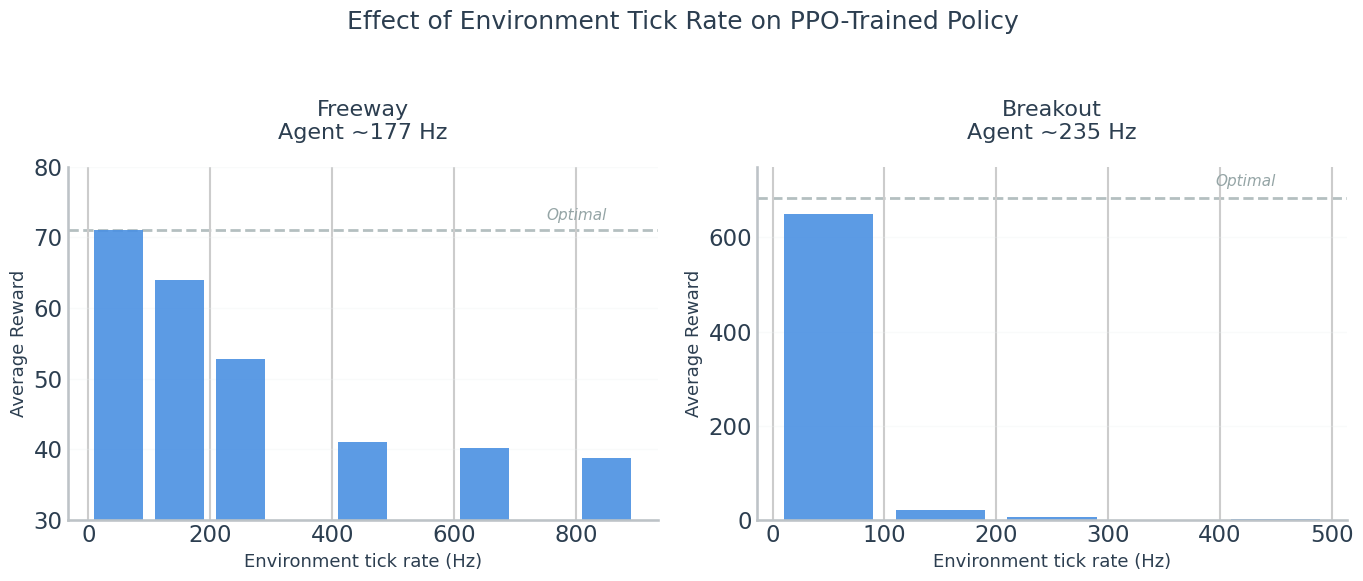

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------
# Data
# ---------------------------
data = {
    "env_hz": [50, 150, 250, 450, 650, 850],
    "Freeway": [71.0, 64.0, 52.8, 41.0, 40.2, 38.7],
    "Breakout": [650.76, 21.0, 5.3, 1.5, None, None],
}

# Optimal rewards
optimal_rewards = {"Freeway": 71.0, "Breakout": 685.0}

df = pd.DataFrame(data)

# ---------------------------
# Minimal flat design style
# ---------------------------
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# Flat color palette - using a sophisticated blue-grey
primary_color = '#4A90E2'  # Soft blue
optimal_color = '#95A5A6'  # Light grey
text_color = '#2C3E50'     # Dark blue-grey
grid_color = '#ECF0F1'     # Very light grey

fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')

# ---------------------------
# Freeway subplot
# ---------------------------
env = "Freeway"
freeway_data = df[['env_hz', env]].dropna()

axes[0].bar(
    freeway_data['env_hz'], 
    freeway_data[env],
    width=80,
    color=primary_color,
    edgecolor='none',
    alpha=0.9
)

axes[0].axhline(
    optimal_rewards[env], 
    color=optimal_color, 
    linestyle='--', 
    linewidth=2,
    alpha=0.7,
    zorder=0
)

axes[0].set_title(
    f"{env}\nAgent ~177 Hz", 
    fontsize=16, 
    color=text_color,
    pad=20,
    fontweight='500'
)
axes[0].set_xlabel("Environment tick rate (Hz)", fontsize=13, color=text_color)
axes[0].set_ylabel("Average Reward", fontsize=13, color=text_color)
axes[0].set_ylim(30, 80)

# Styling
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_color('#BDC3C7')
axes[0].spines['bottom'].set_color('#BDC3C7')
axes[0].tick_params(colors=text_color, which='both', length=0)
axes[0].grid(axis='y', alpha=0.3, color=grid_color, linewidth=1)
axes[0].set_axisbelow(True)

axes[0].text(
    850, 
    optimal_rewards[env] + 1.5, 
    "Optimal", 
    fontsize=11, 
    color=optimal_color,
    ha='right',
    style='italic'
)

# ---------------------------
# Breakout subplot
# ---------------------------
env = "Breakout"
breakout_data = df[['env_hz', env]].dropna()

axes[1].bar(
    breakout_data['env_hz'], 
    breakout_data[env],
    width=80,
    color=primary_color,
    edgecolor='none',
    alpha=0.9
)

axes[1].axhline(
    optimal_rewards[env], 
    color=optimal_color, 
    linestyle='--', 
    linewidth=2,
    alpha=0.7,
    zorder=0
)

axes[1].set_title(
    f"{env}\nAgent ~235 Hz", 
    fontsize=16, 
    color=text_color,
    pad=20,
    fontweight='500'
)
axes[1].set_xlabel("Environment tick rate (Hz)", fontsize=13, color=text_color)
axes[1].set_ylabel("Average Reward", fontsize=13, color=text_color)
axes[1].set_ylim(0, 750)

# Styling
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_color('#BDC3C7')
axes[1].spines['bottom'].set_color('#BDC3C7')
axes[1].tick_params(colors=text_color, which='both', length=0)
axes[1].grid(axis='y', alpha=0.3, color=grid_color, linewidth=1)
axes[1].set_axisbelow(True)

axes[1].text(
    450, 
    optimal_rewards[env] + 25, 
    "Optimal", 
    fontsize=11, 
    color=optimal_color,
    ha='right',
    style='italic'
)

# ---------------------------
# Global title + layout
# ---------------------------
fig.suptitle(
    "Effect of Environment Tick Rate on PPO-Trained Policy", 
    fontsize=18, 
    color=text_color,
    y=0.98,
    fontweight='500'
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('minimal_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()